# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [1]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [2]:
import faceBlendCommon as fbc

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [4]:
# Landmark model location
PREDICTOR_PATH =  "shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

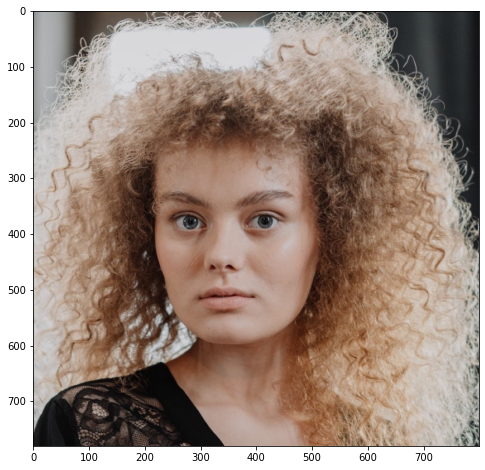

In [5]:
im = cv2.imread("girl-no-makeup.jpg")

imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [6]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

I chose cheeks to implement Feature 1 of the Virtual Makeup project. I defined the coordinates for the left
(left_cheek) and right (right_cheek) cheeks, taking the ready points from dlib. I got the outer contour of the cheeks. 
The idea is that by reducing the area  of the cheek to a certain center of the cheek mass M, we gradually
increase the intensity of the red color (as we know the blush of red). As a result, I have achieved that the blush
has a natural shape and color in the drawing, and the texture of the skin on the blush is preserved.
The MakeBlush function just follows the steps described above.


In [7]:
def GetCoordinate(old_point, cX, cY, scale):
    x = math.ceil(cX - (scale * (cX - old_point[0])))
    y = math.ceil(cY - (scale * (cY - old_point[1])))
    return x, y


def MakeBlush(image, poly):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    mZero = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    cv2.fillPoly(mZero, [poly], (255, 255, 255))

    h = image_hsv[:, :, 0]
    s = image_hsv[:, :, 1]
    v = image_hsv[:, :, 2]

    roi_v = cv2.bitwise_and(v, mZero)

    roi_h = cv2.bitwise_and(h, mZero)

    roi_h = np.where(roi_h < 2, roi_h, roi_h - 2)

    roi_s = cv2.bitwise_and(s, mZero)

    roi_s = np.where(roi_s > 100 - 2, roi_s, roi_s + 2)

    mImg = cv2.merge((roi_h, roi_s, roi_v))
    mImg = cv2.cvtColor(mImg, cv2.COLOR_HSV2RGB)

    cv2.fillPoly(image, [poly], (0, 0, 0))

    image = cv2.bitwise_or(image, mImg)
    return image


In [8]:
p1 = (points[42][0], points[29][1])
p2 = (points[46][0], points[15][1])
p3 = (points[11][0], points[28][1])
p4 = (points[13][0], points[15][1])
p5 = (points[12][0], points[13][1])
p6 = (points[11][0], points[54][1])
p7 = (points[10][0], points[54][1])
p8 = (points[42][0], points[35][1])


left_cheek = np.array([p1, p2, p3, p4, p5, p6, p7, p8])

p1 = (points[39][0], points[29][1])
p2 = (points[41][0], points[1][1])
p3 = (points[5][0], points[28][1])
p4 = (points[3][0], points[1][1])
p5 = (points[4][0], points[3][1])
p6 = (points[5][0], points[48][1])
p7 = (points[6][0], points[48][1])
p8 = (points[39][0], points[31][1])

right_cheek = np.array([p1, p2, p3, p4, p5, p6, p7, p8])


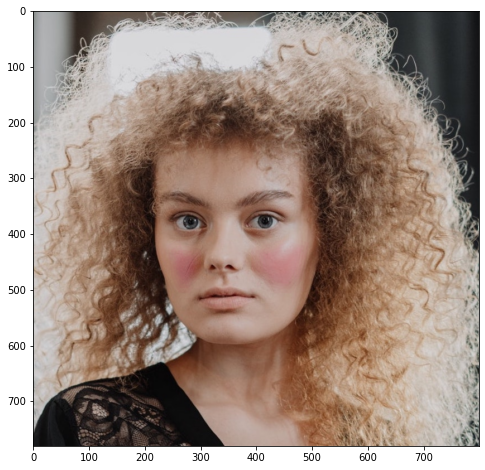

In [9]:
image_blush = imDlib.copy()

M = cv2.moments(left_cheek)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

for i in range(10):
    for j, p in enumerate(left_cheek):
        left_cheek[j] = GetCoordinate(p, cX, cY, 0.85)
    image_blush = MakeBlush(image_blush, left_cheek)


M = cv2.moments(right_cheek)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])


for i in range(8):
    for j, p in enumerate(right_cheek):
        right_cheek[j] = GetCoordinate(p, cX, cY, 0.8)
    image_blush = MakeBlush(image_blush, right_cheek)



plt.imshow(image_blush)



# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

Feature 2 is lips. Here I used ready-made dots from dlib (upper_lips, lower_lips). I chose the color as RGB(255, 0, 94), any other color is possible. I used the addWeighted function with a lipstick overlay factor of 0.3. 
Then, using the mask, I put lipstick on the existing lips.

In [10]:
upper_lips = np.array([points[48], points[49], points[50], points[51], points[52], points[53]
                      , points[54], points[63], points[62], points[61]])

lower_lips = np.array([points[48], points[60], points[67], points[66], points[65], points[64]
                       , points[54], points[55], points[56], points[57], points[58], points[59]])


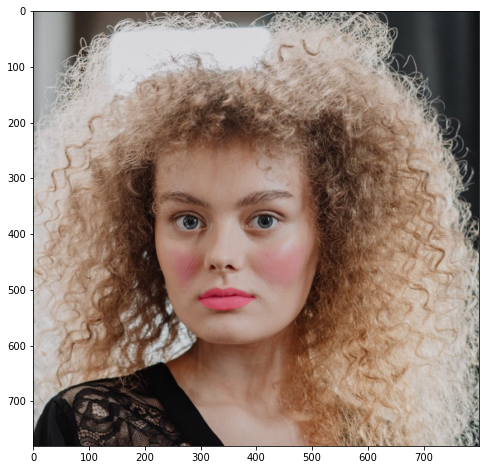

In [11]:
image_lips = image_blush.copy()
image_lips_temp = np.ones(image_lips.shape, image_lips.dtype)
image_lips_temp[:, :, 0] *= 255
image_lips_temp[:, :, 1] *= 0
image_lips_temp[:, :, 2] *= 94

image_lips_blended = cv2.addWeighted(image_lips, 0.7, image_lips_temp, 0.3, 0)

mask_blended = np.zeros(image_lips.shape, image_lips.dtype)
cv2.fillPoly(mask_blended, [upper_lips], (255, 255, 255))
cv2.fillPoly(mask_blended, [lower_lips], (255, 255, 255))
image_lips_blended = cv2.bitwise_and(image_lips_blended, mask_blended).astype('uint8')

cv2.fillPoly(image_lips, [upper_lips], (0, 0, 0))
cv2.fillPoly(image_lips, [lower_lips], (0, 0, 0))
image = cv2.bitwise_or(image_lips, image_lips_blended)


plt.imshow(image)

